In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import seaborn as sns
plt.style.use('seaborn-white')

In [2]:
directory = '../data/raw/logs'
def get_log_files():
    result = []
    for filename in os.listdir(directory):
        data_size = re.search("kafka_producer_log_(\d+).csv", filename)
        if data_size:
            result.append((data_size[1], filename))
    return result

In [3]:
log_files = get_log_files()

In [4]:
log_files

[('131072', 'kafka_producer_log_131072.csv'),
 ('65536', 'kafka_producer_log_65536.csv'),
 ('8192', 'kafka_producer_log_8192.csv'),
 ('32768', 'kafka_producer_log_32768.csv'),
 ('4096', 'kafka_producer_log_4096.csv'),
 ('262144', 'kafka_producer_log_262144.csv'),
 ('524288', 'kafka_producer_log_524288.csv')]

In [5]:
def create_dataframe(log_files):
    joined_df = pd.DataFrame()
    for data_size, filename in log_files:
        df  = pd.read_csv(directory + "/" + filename, sep='\t')
        df["Message Size in Bytes"] = int(data_size)
        df = df[df["Number of Messages"] != 0]
        joined_df = pd.concat([joined_df, df])
    return joined_df

In [6]:
df = create_dataframe(log_files)

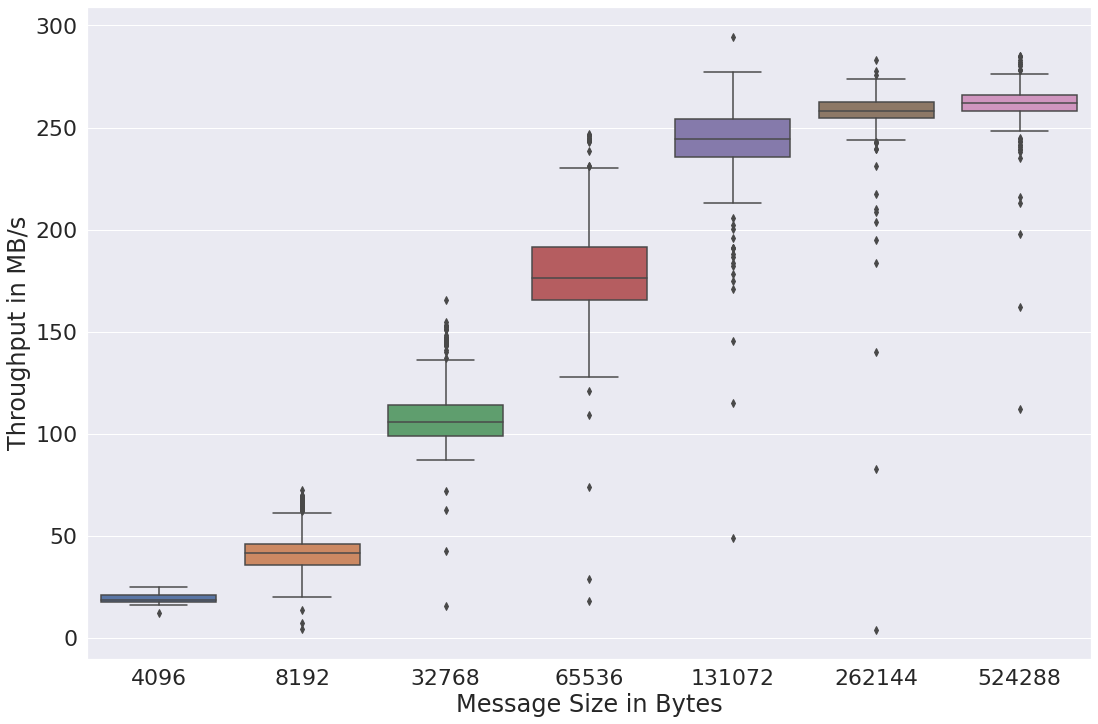

In [14]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)
# sns.set(font_scale=2)
sns.boxplot(x="Message Size in Bytes", y="Throughput in MB/s", data=df, ax=ax)

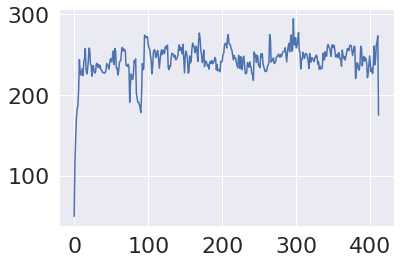

In [19]:
df[df["Message Size in Bytes"] == 131072]["Throughput in MB/s"].plot()